# PE VS ROE
- เปรียบเทียบ PE และ ROE ของหุ้นข้ามอุตสาหกรรม

In [1]:
import sys
import os
import pandas as pd 
import time

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00104


In [134]:
# หาสมาชิกในดัชนี set100
member = sx.get_member_of_index(indexType.set100)
for i in member['symbol']:
   print(f'{i},',end='')

AAV,ADVANC,AEONTS,AMATA,AOT,AP,AWC,BA,BAM,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEM,BGRIM,BH,BJC,BLA,BSRC,BTG,BTS,CBG,CENTEL,CHG,CK,CKP,COM7,CPALL,CPF,CPN,CRC,DELTA,DOHOME,EA,EGCO,ERW,GLOBAL,GPSC,GULF,GUNKUL,HANA,HMPRO,ICHI,INTUCH,IRPC,ITC,IVL,JAS,JMART,JMT,KBANK,KCE,KKP,KTB,KTC,LH,M,MBK,MEGA,MINT,MTC,OR,OSP,PLANB,PRM,PTT,PTTEP,PTTGC,QH,RATCH,RBF,RCL,SAPPE,SAWAD,SCB,SCC,SCGP,SIRI,SISB,SJWD,SKY,SPALI,SPRC,STA,STGT,TASCO,TCAP,TIDLOR,TIPH,TISCO,TLI,TOA,TOP,TRUE,TTB,TU,VGI,WHA,

In [136]:
roe = sx.get_ratio('BTS')
c = roe.columns[-1]
roe_ = roe[roe.index.str.contains('ROE')][c].iloc[0]
print(roe_)

-9.71645351412256


In [138]:
pe = sx.get_ratio('BTS',hist=True)
c = pe.columns[0]
pe_ = pe[pe.index=='pe'][c].iloc[0]
print(pe_)

nan


In [140]:
import random
basket = list(member['symbol'])
basket = basket + ['MC','RBF','DUSIT','SFT','AURA','SYMC','SABINA','MGI','BTG'] # ตัวอย่างการเพิ่มสมาชิก
basket = list(set(basket)) # ป้องกันซ้ำ

random.shuffle(basket)
for i in basket:
  print(i,end=',')  

CPN,AAV,ITC,AURA,SPALI,SFT,SCGP,GULF,BBL,KBANK,INTUCH,CK,IVL,BJC,TLI,SISB,SAWAD,HANA,SCB,HMPRO,KTC,TIDLOR,PTT,BCP,BA,BEM,OSP,ADVANC,SABINA,TOP,CRC,CPALL,DUSIT,CKP,M,PLANB,LH,PTTGC,TOA,PTTEP,TCAP,MEGA,BSRC,SPRC,BLA,BTS,COM7,DELTA,KKP,AWC,GUNKUL,MBK,RATCH,CHG,ICHI,MTC,SAPPE,CENTEL,TASCO,SJWD,IRPC,TU,TIPH,GPSC,JMT,TTB,STGT,VGI,BH,TISCO,PRM,KTB,OR,CPF,BCPG,ERW,SCC,WHA,SIRI,SKY,MC,JAS,BANPU,RBF,JMART,BGRIM,EGCO,CBG,BDMS,AEONTS,EA,KCE,BCH,MINT,RCL,STA,AMATA,DOHOME,QH,GLOBAL,SYMC,BTG,MGI,AOT,AP,TRUE,BAM,

In [142]:
PE_DS = []
ROE_DS = []
SYMBOL_DS = []
try_load = 0
while(1):
  c = 0  
  try:  
    for i in basket:
      c+=1  

      roe = sx.get_ratio(i)
      col = roe.columns[-1]
      roe_ = roe[roe.index.str.contains('ROE')][col].iloc[0]

      pe = sx.get_ratio(i,hist=True)
      col = pe.columns[0]
      pe_ = pe[pe.index=='pe'][col].iloc[0]

      PE_DS.append(pe_)
      ROE_DS.append(roe_)  
      SYMBOL_DS.append(i)  
      print(c,i,pe_,roe_)  

  except Exception as e:
    try_load+=1  
    time.sleep(3)
    print('try again',e,i)  
  if(c==len(basket)):
    break 
  if(try_load==3):
    break  

1 CPN 17.91 19.071683605616172
2 AAV 42.73 -1.1722858703567407
3 ITC 22.12 14.172438050952554
4 AURA 19.82 17.94441313350731
5 SPALI 7.24 10.851749478820063
6 SFT 50.71 4.244093425318817
7 SCGP 21.2 7.270459547065971
8 GULF 44.28 14.495064464039341
9 BBL 6.95 7.982249889359901
10 KBANK 7.69 8.824903931782691
11 INTUCH 22.91 36.60123260337509
12 CK 24.09 5.598725835487009
13 IVL nan -20.35609706681825
14 BJC 25.38 3.3615863237257706
15 TLI 12.98 9.721172232411952
16 SISB 43.56 28.32247088520879
17 SAWAD 12.1 18.412791178456434
18 HANA 23.59 5.6679296995448505
19 SCB 8.83 8.943148294327493
20 HMPRO 21.5 25.809027152538768
21 KTC 17.17 21.282832252650735
22 TIDLOR 12.57 14.54511246627869
23 PTT 7.45 11.270405950123818
24 BCP 3.54 20.42160426101407
25 BA 12.4 23.81097798051651
26 BEM 33.18 10.201000573388136
27 OSP 26.83 15.140864736320703
28 ADVANC 24.96 35.554072635249206
29 SABINA 16.67 25.29433526158157
30 TOP 4.48 15.71056408872273
31 CRC 24.91 11.877697095689165
32 CPALL 26.17 20.644

In [144]:
df =  pd.DataFrame({'SYMBOL':SYMBOL_DS,'PE':PE_DS,'ROE':ROE_DS})
df.to_csv('PE_ROE.csv')
df.sample(5)

SYMBOL     PE        ROE
79     SKY  29.13  12.294300
101    BTG    NaN  -3.611863
9    KBANK   7.69   8.824904
80      MC  13.55  19.121919
12     IVL    NaN -20.356097

In [146]:
df = df.dropna()
df = df.drop(df[df['SYMBOL']=='JAS'].index)

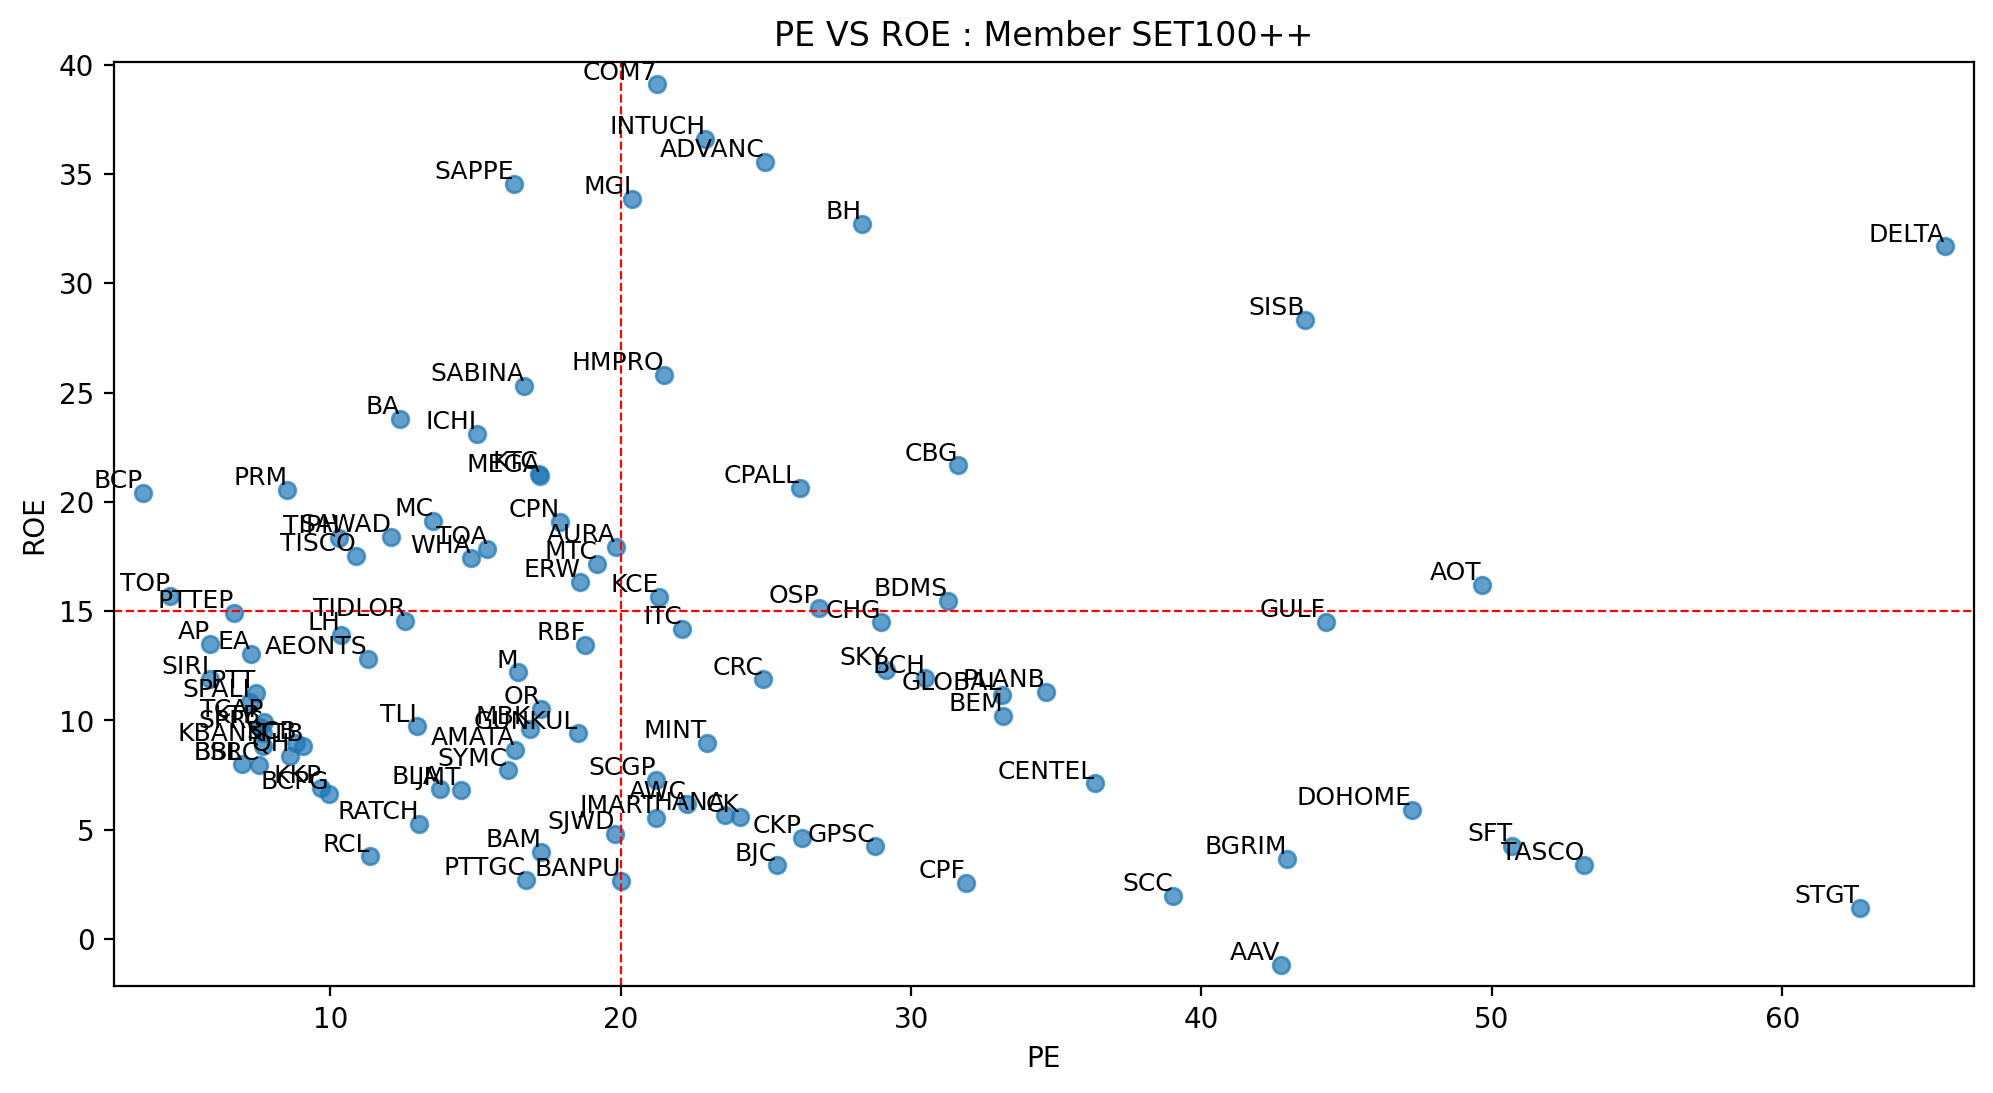

In [148]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,6))

labels = list(df['SYMBOL'])
x = list(df['PE'])
y = list(df['ROE'])
plt.scatter(x,y,alpha=0.7)
plt.title('PE VS ROE : Member SET100++')
plt.xlabel('PE')
plt.ylabel('ROE')

# เพิ่มเส้นแกน X และ Y
plt.axhline(15, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
plt.axvline(20, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
plt.xlim(min(x)-1, max(x)+1)  # ขยายขอบเขตของแกน X
plt.ylim(min(y)-1, max(y)+1)  # ขยายขอบเขตของแกน Y

# เพิ่ม label บนแต่ละจุด
for i, label in enumerate(labels):
   plt.text(x[i], y[i], label, fontsize=9, ha='right', va='bottom')
plt.show()


In [150]:
df[(df['PE']>24) & (df['PE']<26) ].sort_values('PE',ascending=False)

SYMBOL     PE        ROE
13     BJC  25.38   3.361586
27  ADVANC  24.96  35.554073
30     CRC  24.91  11.877697
11      CK  24.09   5.598726

In [152]:
df[df['SYMBOL']=='SYMC']

SYMBOL     PE       ROE
100   SYMC  16.11  7.711173

## เปรียบเทียบราคาที่จ่ายกับสิ่งที่ได้

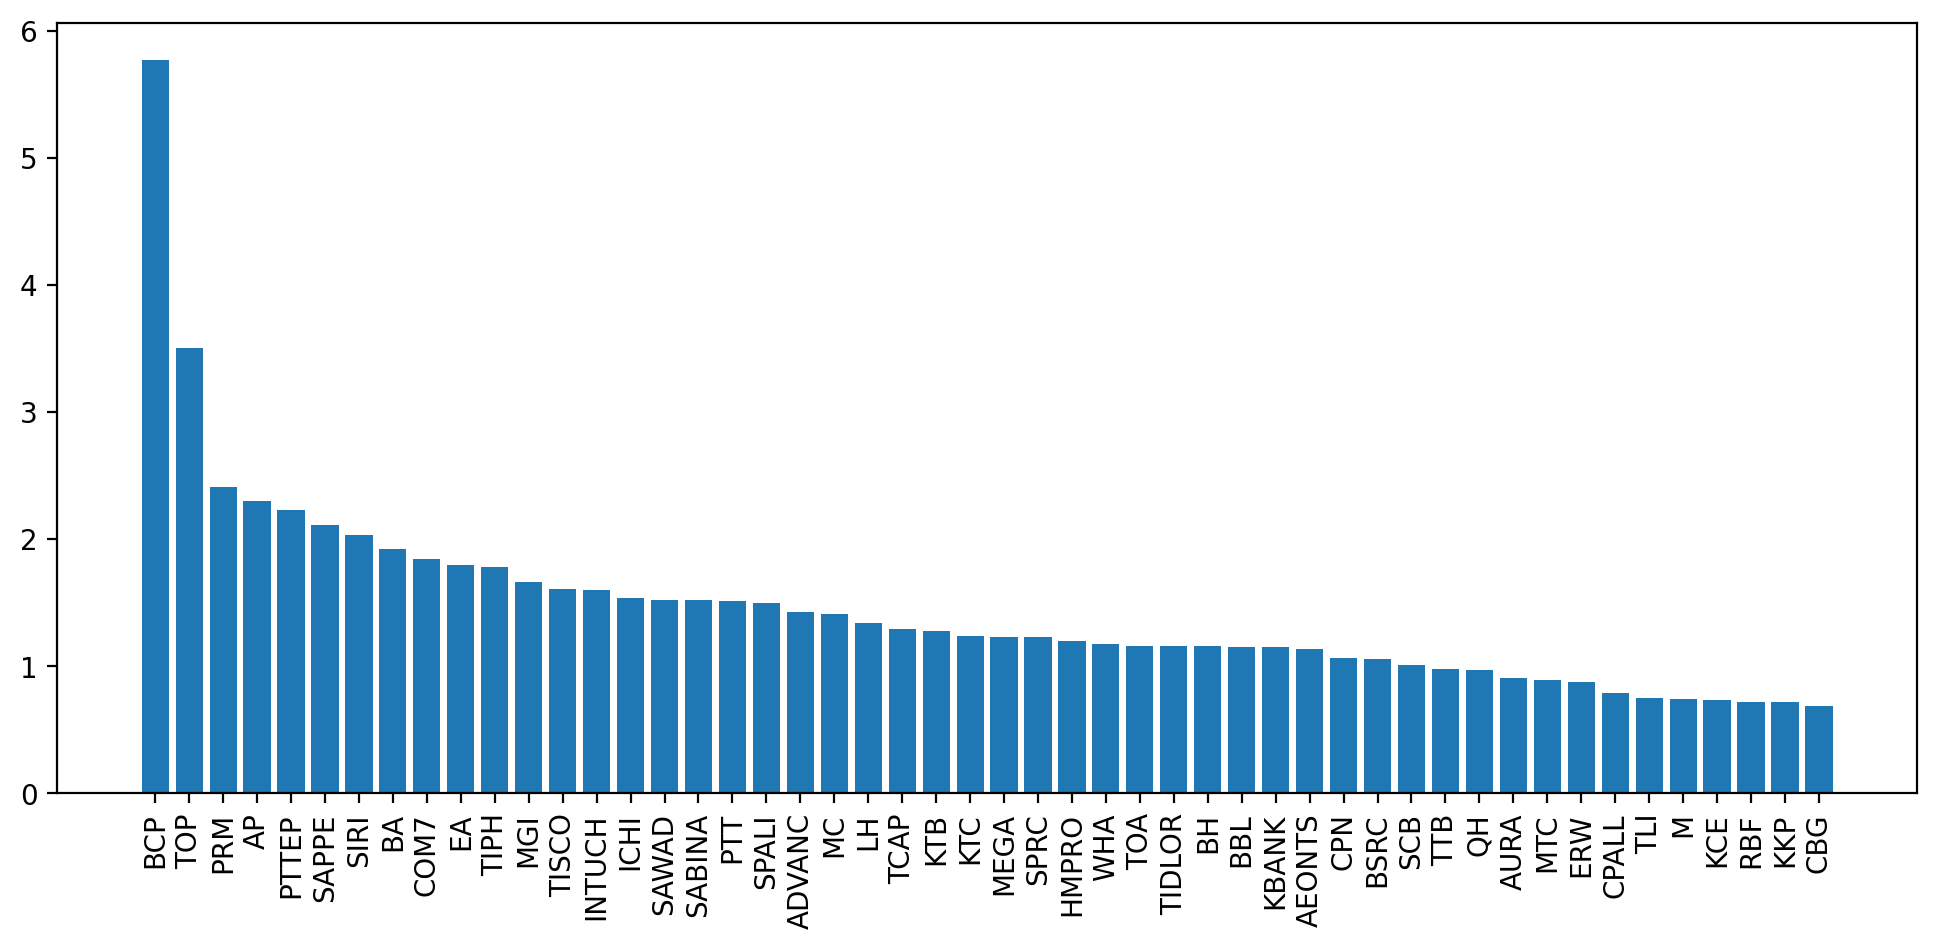

In [155]:
df['ROE/PE'] = df['ROE'] / df['PE']
df = df.sort_values('ROE/PE',ascending=False)
plt.subplots(figsize=(12,5))
plt.bar(x=df['SYMBOL'].head(50),height=df['ROE/PE'].head(50))
plt.xticks(rotation=90)
plt.show()

In [35]:
import yfinance as yf

# ฟังก์ชันสำหรับดึง Forward P/E
def get_forward_pe(ticker):
    # ดึงข้อมูลหุ้นด้วย yfinance
    stock = yf.Ticker(ticker)
    
    # ดึงข้อมูลสถิติต่าง ๆ ของหุ้น
    stats = stock.info
    #print(stats)
    # ตรวจสอบว่ามีข้อมูล Forward P/E หรือไม่
    forward_pe = stats.get('forwardPE', 'Forward P/E not available')
    #print(stats)
    return forward_pe

# ตัวอย่างการใช้งาน
ticker = 'SABINA.BK'  # ใส่สัญลักษณ์หุ้นที่ต้องการ
forward_pe = get_forward_pe(ticker)
print(f"Forward P/E for {ticker}: {forward_pe}")

Forward P/E for SABINA.BK: 14.49367


In [159]:
df = pd.read_csv('PE_ROE.csv')
df = df.dropna()
df = df.drop(df[df['SYMBOL']=='JAS'].index)

## Forward P/E
- ใช้ Forward P/E แทนค่า P/E ปัจจุบัน

In [162]:
try_c = 0
while(1):
  PE_FORWARD_DS = []
  SYMBOL_PE_F_DS = []
  no=1
  try:
    for i in df.SYMBOL:
      try:  
        forward_pe = get_forward_pe(i+'.BK')  
        forward_pe = float(forward_pe)  
        PE_FORWARD_DS.append(forward_pe)
        SYMBOL_PE_F_DS.append(i)    
        print(f'{no} {i} {forward_pe} | ',end=',')  
        #time.sleep(1)  
        no+=1
      except:  
        continue
    # when complete    
    print(f'done {i} ✅')  
    break  
  except:
    try_c+=1
    print(f'error {i} ❌')  

  if(try_c>3):
    break  

1 CPN 17.377262 | ,2 AAV 14.666667 | ,3 ITC 19.430893 | ,4 AURA 18.17073 | ,5 SPALI 5.7102275 | ,6 SCGP 17.438272 | ,7 GULF 33.37838 | ,8 BBL 6.701254 | ,9 KBANK 7.251909 | ,10 INTUCH 23.024832 | ,11 CK 16.129032 | ,12 BJC 18.703703 | ,13 SISB 27.97619 | ,14 SAWAD 10.121951 | ,15 HANA 14.945652 | ,16 SCB 8.221226 | ,17 HMPRO 18.771929 | ,18 KTC 14.938081 | ,19 TIDLOR 9.465241 | ,20 PTT 8.815789 | ,21 BCP 4.4170675 | ,22 BA 19.291338 | ,23 BEM 29.107141 | ,24 OSP 21.333334 | ,25 ADVANC 22.55639 | ,26 SABINA 14.367088 | ,27 TOP 5.604883 | ,28 CRC 19.590643 | ,29 CPALL 22.586206 | ,30 CKP 15.2 | ,31 M 15.414508 | ,32 PLANB 26.833332 | ,33 LH 9.523809 | ,34 PTTGC 10.379062 | ,35 TOA 13.642858 | ,36 PTTEP 7.1351933 | ,37 TCAP 7.142857 | ,38 MEGA 13.715278 | ,39 BSRC 4.7076025 | ,40 SPRC 5.9829063 | ,41 BLA 10.206612 | ,42 COM7 17.881945 | ,43 DELTA 58.46561 | ,44 KKP 7.5851393 | ,45 AWC 37.2 | ,46 GUNKUL 15.052631 | ,47 MBK 9.731183 | ,48 RATCH 8.248731 | ,49 CHG 21.384617 | ,50 ICHI 14.363

In [164]:
forward_pe = pd.DataFrame({'SYMBOL':SYMBOL_PE_F_DS,'FORWARD_PE':PE_FORWARD_DS})
forward_pe.sample(5)

SYMBOL  FORWARD_PE
33   PTTGC   10.379062
29     CKP   15.200000
79     KCE   18.810680
25  SABINA   14.367088
13   SAWAD   10.121951

In [166]:
k1 = df[['SYMBOL','PE','ROE']]
k1 = k1.set_index('SYMBOL')
k2 = forward_pe.set_index('SYMBOL')
result = k1.join(k2, how='inner')
result.to_csv('FORWARD_PE_ROE.csv')

In [3]:
df = pd.read_csv('FORWARD_PE_ROE.csv')

In [5]:
#report = df[((df['FORWARD_PE']*2) < df['PE'])  &  (df['ROE']>0)]
report = df

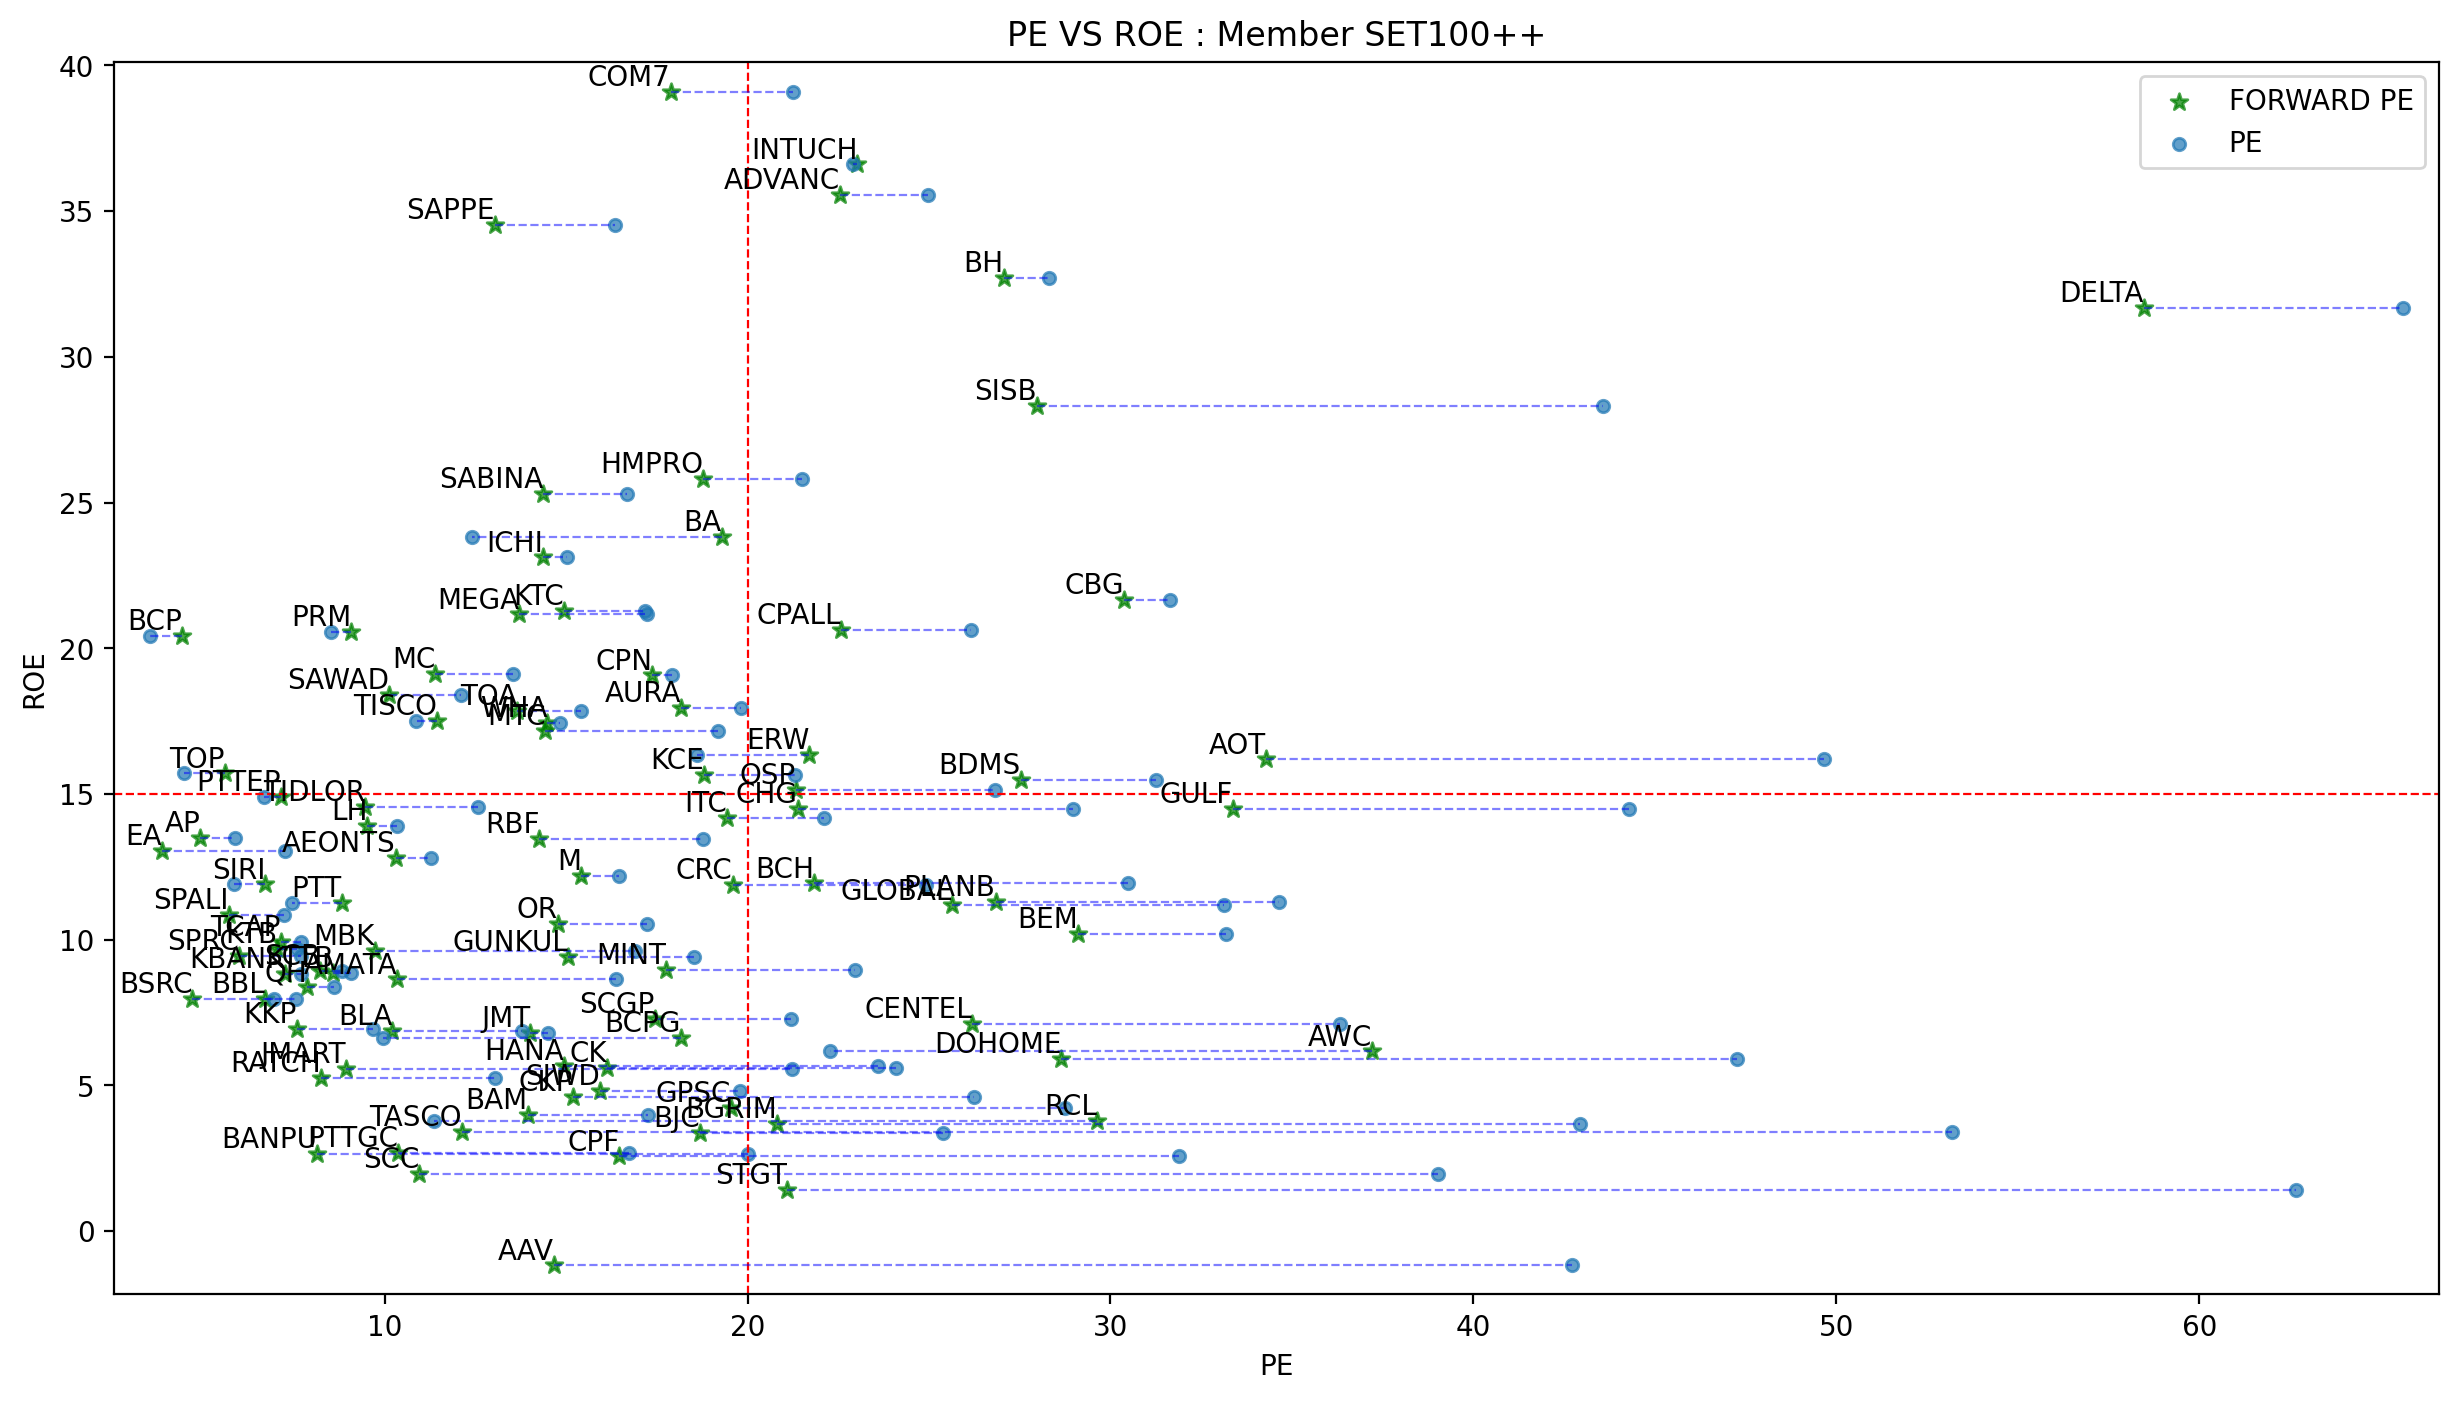

In [21]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,8))

labels = list(report['SYMBOL'])
x = list(report['PE'])
y = list(report['ROE'])
x2 = list(report['FORWARD_PE'])

plt.scatter(x2,y,alpha=0.7,label='FORWARD PE',marker='*',color='green',s=40)
plt.scatter(x,y,alpha=0.7,label='PE',s=20)

plt.title('PE VS ROE : Member SET100++')
plt.xlabel('PE')
plt.ylabel('ROE')

# เพิ่มเส้นแกน X และ Y
plt.axhline(15, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
plt.axvline(20, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
plt.xlim(min(x)-1, max(x)+1)  # ขยายขอบเขตของแกน X
plt.ylim(min(y)-1, max(y)+1)  # ขยายขอบเขตของแกน Y

# เพิ่ม label บนแต่ละจุด
#for i, label in enumerate(labels):
#   plt.text(x[i], y[i], label, fontsize=9, ha='right', va='bottom')

for i, label in enumerate(labels):
     plt.text(x2[i], y[i], label, fontsize=10, ha='right', va='bottom')

# ขีดเส้นเชื่อมระหว่างจุดเดิมกับจุดใหม่
for i in range(len(x)):
    plt.plot([x2[i], x[i]], [y[i], y[i]], 'b--',alpha=0.5,linewidth=0.8)  # เส้นประสีแดง
    
plt.legend()
plt.savefig('PE_ROE.png')
plt.show()


In [15]:
df['ROE/FORWARD_PE'] = df['ROE']/df['FORWARD_PE']
df.sort_values('ROE/FORWARD_PE',ascending=False).head(10)

SYMBOL     PE        ROE  FORWARD_PE    PE_Chg  ROE/FORWARD_PE
20    BCP   3.54  20.421604    4.417067  1.247759        4.623340
78     EA   7.25  13.036419    3.869565  0.533733        3.368962
26    TOP   4.48  15.710564    5.604883  1.251090        2.803014
88     AP   5.87  13.500154    4.925373  0.839075        2.740940
51  SAPPE  16.34  34.541609   13.041339  0.798124        2.648624
61    PRM   8.52  20.553343    9.076087  1.065268        2.264560
41   COM7  21.25  39.102653   17.881945  0.841503        2.186711
35  PTTEP   6.68  14.906655    7.135193  1.068143        2.089173
4   SPALI   7.24  10.851749    5.710228  0.788705        1.900406
13  SAWAD  12.10  18.412791   10.121951  0.836525        1.819095

In [9]:
# หาอัตราการเปลี่ยนแปลง
df['PE_Chg'] = (df['FORWARD_PE'] / df['PE'])
df.sort_values('PE_Chg').head(10)

SYMBOL     PE        ROE  FORWARD_PE    PE_Chg
53  TASCO  53.18   3.394763   12.133334  0.228156
67    SCC  39.03   1.956429   10.955183  0.280686
58   STGT  62.67   1.413889   21.090910  0.336539
1     AAV  42.73  -1.172286   14.666667  0.343241
71  BANPU  20.01   2.656903    8.132530  0.406423
73  JMART  21.23   5.554417    8.928572  0.420564
74  BGRIM  42.94   3.669305   20.803570  0.484480
64    CPF  31.88   2.567510   16.466667  0.516520
78     EA   7.25  13.036419    3.869565  0.533733
46    MBK  16.89   9.610999    9.731183  0.576151

In [320]:
df[df['SYMBOL']=='SABINA']

SYMBOL     PE        ROE  FORWARD_PE    PE_Chg
25  SABINA  16.67  25.294335   14.367088  0.861853

In [63]:
get_forward_pe('SABINA.BK')

14.556962